# PCA_K_means_dogs

In [1]:
#Carga de librerias necesarias:
%matplotlib inline
import imageio as imio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn import preprocessing # For scaling
from sklearn.manifold import TSNE

* A continuacion se extrae y se prepara la data para la implementacion del algoritmo, este procedimiento se copia de la tarea anterior de **KNN**:

In [2]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [3]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['features'] = np.load(images_inception_features)

In [4]:
## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
images_name = training_set_dict['images_name']

* Ahora que ya tenemos la data comenzamos a explorarla

In [5]:
print('Cantidad de elementos en el dataSet: ', len(images_name))

Cantidad de elementos en el dataSet:  10222


Podemos observar que el dataSet esta compuesto por 10222 entradas, ahora, exploraremos el nuemero de features:

In [6]:
print('El numero de features es:', len(features[0]))

El numero de features es: 2048


### NOTA:

Dado que es aprendizaje no supervizado, la variable Y (labels) no sera utilizada ya que de por si en un escenario real, no tendriamos acceso a ella, y por ende tampoco tendriamos acceso al numero de razas de perros. Por tanto las siguientes variables se obtienen unicamente para visualizar sus valores, pero las mismas **no seran tomadas en cuenta para la implementacion de los algoritmos**

In [7]:
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_set_dict['label'] = np.load(training_image_labels_array)
labels = training_set_dict['label']
numbersRaces = np.unique(labels)
print('El numero de razas es: ', len(numbersRaces))

El numero de razas es:  120


Por consiguiente, la unica variable que realmente utilizaremos sera X (features)

Carga del dataSet de pruebas:

In [8]:
test_features = np.load('./data/test/test_inception_features_array.npy')
print(len(test_features))
print(len(test_features[0]))

2
2048


Vemos que para el dataset de pruebas unicamente contamos con dos observarciones (comparadas con las 10222 del data set de entrenamiento). Por tal razon, se procedera a utilizar parte del dataset de entrenamiento para realizar las pruebas. 

## Implementacion del algoritmo PCA para reduccion de dimensionalidad y visualizacion

Dado que en este caso utilizaremos el algoritmo de PCA para reduccion de dimensionalidad, procedemos a aplicarlo a todo el dataset sin discriminar entre el dataset de pruebas y validcion.

In [9]:
redoxNumber = 2

In [10]:
normFeatures = preprocessing.normalize(features) #Normalizacion de features

In [11]:
pca = PCA(n_components=redoxNumber) #Reduccion de dimensionalidad a 2 features (algo que vamos a poer visualizar)
X2D = pca.fit_transform(normFeatures) 

In [12]:
#Comparacion de las dimensiones, antes y despues (numero de features)
print(normFeatures.shape)
print(X2D.shape)

(10222, 2048)
(10222, 2)


**Visualizacion**

Text(0, 0.5, 'component 2')

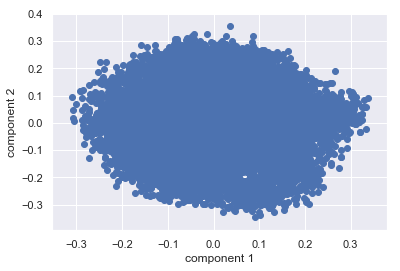

In [13]:
plt.scatter(X2D[:, 0], 
            X2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

## Implementacion del algoritmo k means para clustering:

#### Etapa de entrenamiento:

In [14]:
#Ser realiza un split de la data:
porcentTrain = int((X2D.shape[0])*0.8)
clusterNumFact = 10

In [15]:
X2D_train = X2D[:porcentTrain]
X2D_test  = X2D[porcentTrain:]

In [16]:
X2D_train.shape

(8177, 2)

In [17]:
X2D_test.shape

(2045, 2)

In [18]:
#procedemos a varios modelos con distinto numero de clusters:
kmeans = KMeans(n_clusters=clusterNumFact, random_state=0).fit(X2D_train)

#### Etapa de pruebas:

In [19]:
#Entrenamiento del modelo:
clusters = kmeans.predict(X2D_test)
centers = kmeans.cluster_centers_

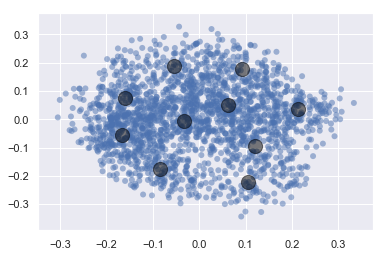

In [20]:
#Visualizacion de los clusters:
plt.scatter(X2D_test[:, 0], X2D_test[:, 1],
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Implementacion del algoritmo t-SNE para reduccion de dimensionalidad y visualizacion.

Para cuestiones de visualizacion y reduccion de dimensionalidad se utilizara el dataSet completo.

In [38]:
tsneModel =  TSNE(learning_rate=0.01)
subsetFeat = normFeatures[:500]

Nota: Se tuvo problemas al momento de correr el algoritmo con toda la data, por tal razon, se procedio a acortar el tamano de las observaciones.

In [39]:
transformed = tsneModel.fit_transform(subsetFeat) #Introduccion de la data ya normalizada.

In [40]:
xS = transformed[:,0]
yS = transformed[:,0]

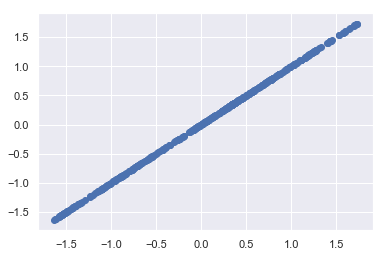

In [41]:
plt.scatter(xS,yS)
plt.show()

* Comparacion de la data con diferentes valores de Learning rates:

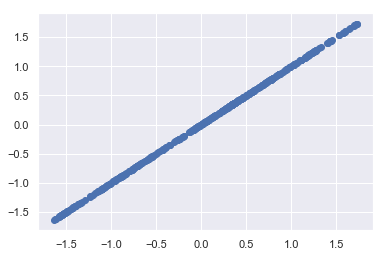

In [42]:
tsneModel =  TSNE(learning_rate=0.1)
subsetFeat = normFeatures[:500]
xS = transformed[:,0]
yS = transformed[:,0]
plt.scatter(xS,yS)
plt.show()

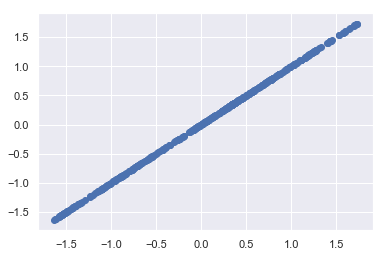

In [43]:
tsneModel =  TSNE(learning_rate=1)
subsetFeat = normFeatures[:500]
xS = transformed[:,0]
yS = transformed[:,0]
plt.scatter(xS,yS)
plt.show()

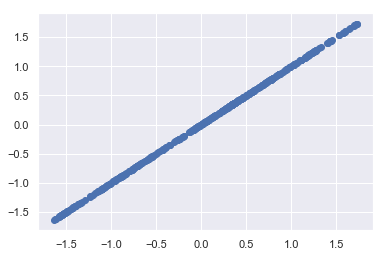

In [45]:
tsneModel =  TSNE(learning_rate=0.00001)
subsetFeat = normFeatures[:500]
xS = transformed[:,0]
yS = transformed[:,0]
plt.scatter(xS,yS)
plt.show()

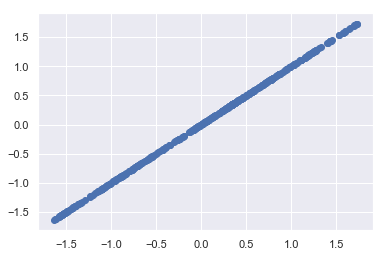

In [46]:
tsneModel =  TSNE(learning_rate=0.00000001)
subsetFeat = normFeatures[:500]
xS = transformed[:,0]
yS = transformed[:,0]
plt.scatter(xS,yS)
plt.show()

**Conclusiones/comentarios**

* En cuanto a la implementacion de clusters a traves de kmeans, dado que es aprendizaje no supervizado y asumiendo que no conocemos la cantidad de clusters a utilizar no existe una respuesta correcta exacta en cuanto al valor de este hiperparametro. Dependiendo de la cantidad de grupos que se deseen explorar  asi sera el valor del hiperparametro que se utilizara.  

* Tampoco existe forma de evaluar el accuracy como tal debido a que en un ambiente real, no se conocen las etiquetas como tal. (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

* Al momento de aplicar los algoritmos de reduccion de dimensionalidad, se aplico escalamiento a la data ya que al menos en el caso de PCA, esta explicitamente indicado que la data esta centrada pero no normalizada. Para el algoritmo de T-SNE, de igual forma, ya que aunque no especifica directamente en la documentacion oficial que se tiene que realizar, es importante hacerlo si se quiere tratar a cada feature con la misma importancia (fuente: https://stats.stackexchange.com/questions/164917/should-data-be-centeredscaled-before-applying-t-sne).

* Vemos que el valor del learning rate no parece afectar al entrenamiento del modelo T-SNE


**Diferencias y similitudes entre el algoritmo de PCA y T-SNE**

*Similitudes*: 

En cuanto a lo observado y en base a las conclusiones realizadas en el apartado anterior, una de las similitudes importantes es que para ambos algoritmos es necesario el escalamiento de datos.

Otra similitud es la capacidad que ambos tienen al momento de elegir el numero de dimensiones a reducir. Si lo que se necesita es visualizar la data, entonces no tiene sentido reducirla en dimensiones mayores a tres.

*Diferencias*

La principal diferencia en cuanto a la forma de implementacion de los algoritmos, es la utilizacion del learning rate en t-sne. Esto nos dice que este algoritmo basa su fincionamiento matematico en gradientes para lograr su entrenamiento. Por otra parte, el algoritmo PCA se basa en modelos puramente probabilisticos.

La forma en la que reducen la dimensionalidad, es bastante distinta. Esto queda evidenciado en la forma que presentan los datos en un plano 2D, la razon de este comportamiento en parte es por el tipo de funcionamiento que poseen internamente. 